In [69]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import Dropout

In [49]:
# regularization

# from keras.layers import Dropout

In [70]:
# 5 = 5 features, 5 values in the past to predict the future values
# NUM_OF_PREV_ITEMS = 10 = 10 observations in the past

NUM_OF_PREV_ITEMS = 5

In [51]:
# def reconstruct_data(data_set, n=1):
# n=1 is the NUM_OF_PREV_ITEMS = 5 we have to consider in the past
# As we have defined
# train_x, train_y = reconstruct_data(train, NUM_OF_PREV_ITEMS)

# Initialize empty lists for x and y:
# These lists will be used to store the input features (x) and corresponding target values (y) after processing the data_set.

# a = data_set[i : (i + n), 0]
# x.append(a)
# Extract a sequence for x:
# Inside the loop, a sequence of length n is extracted from the data_set.
# It takes data_set[i : (i + n), 0], which means it selects a slice of data_set
# starting from index i up to (but not including) # index i + n.
# The , 0 part indicates that only the first column of the slice is selected.
# This sequence is then appended to the x list.

# y.append(data_set[i + n, 0])
# Extract the corresponding target value for y:
# After extracting the x sequence, the code also extracts the element at index i + n from the data_set,
# which is the value that follows the n-length sequence. This value is appended to the y list.

# return numpy.array(x), numpy.array(y)
# Return numpy arrays:
# Finally, the function converts the x and y lists into numpy arrays using numpy.array().
# These numpy arrays are then returned as the output of the function.

# In summary, the reconstruct_data function takes a dataset, and for each element in the dataset,
# it creates an input sequence (x) of length n and a corresponding target value (y).
# It does this by sliding a window of size n through the dataset and extracts the necessary elements to form training pairs.
# This kind of data preparation is often used in time series forecasting or sequence prediction tasks in machine learning.


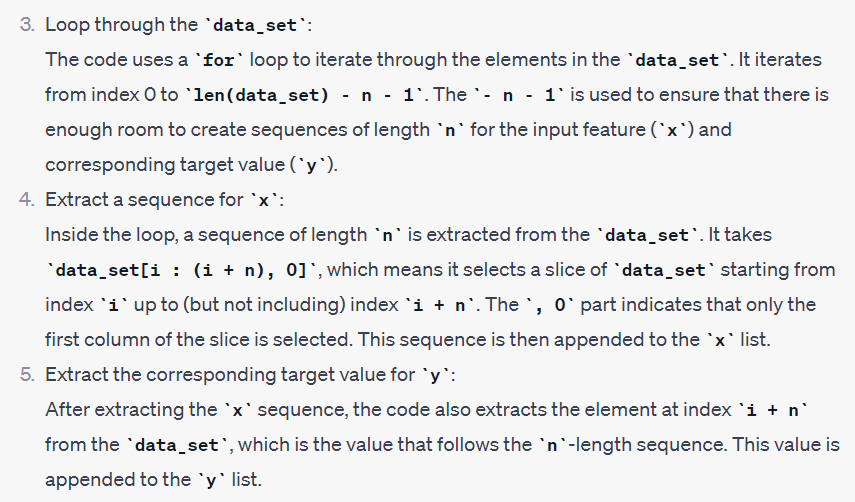

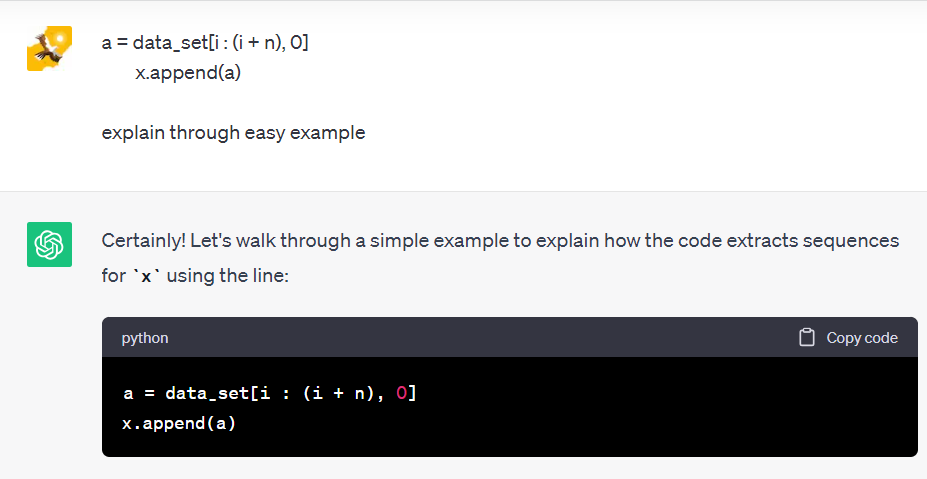

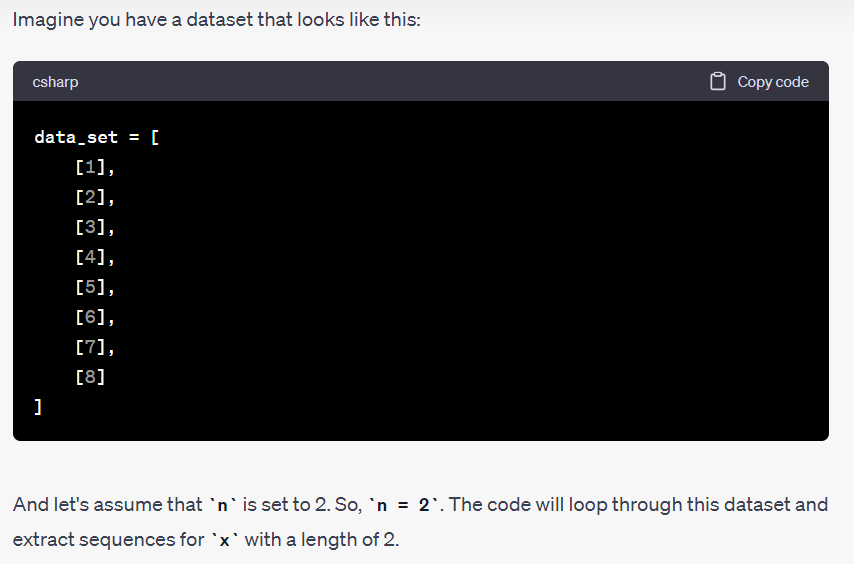

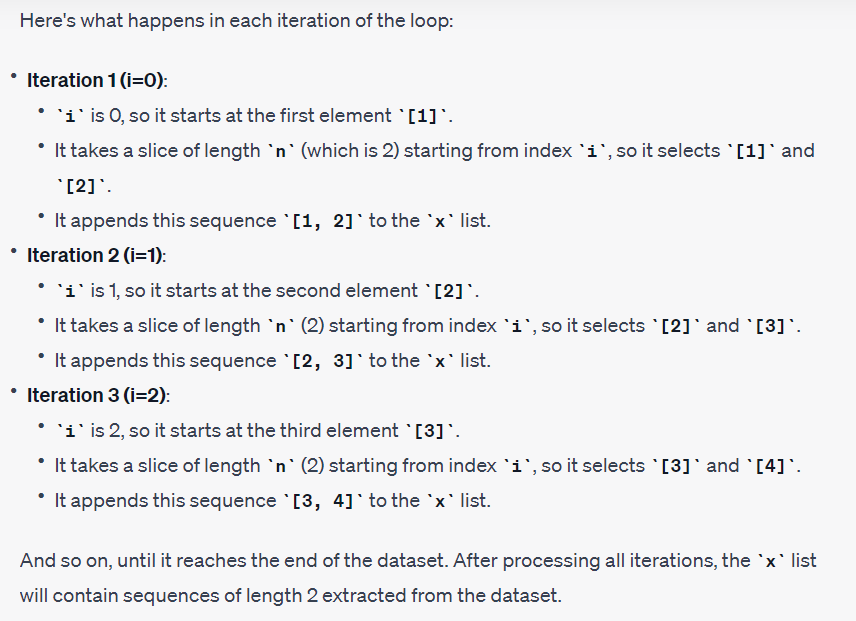

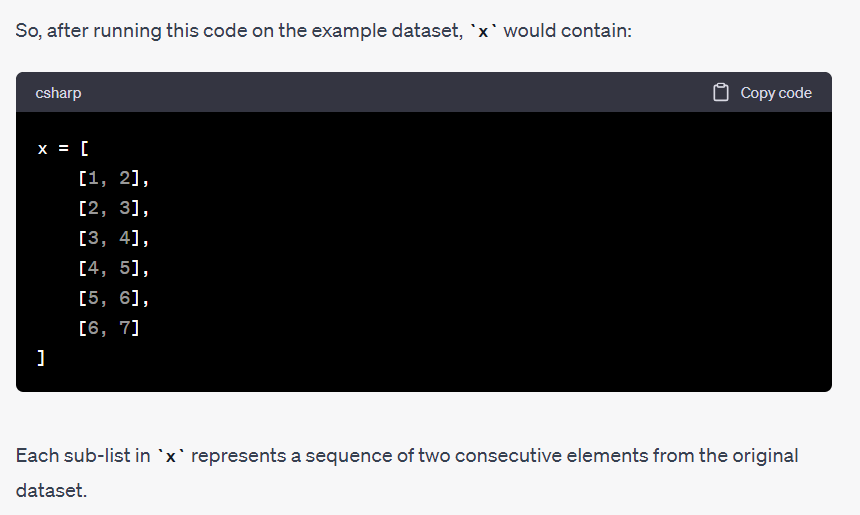

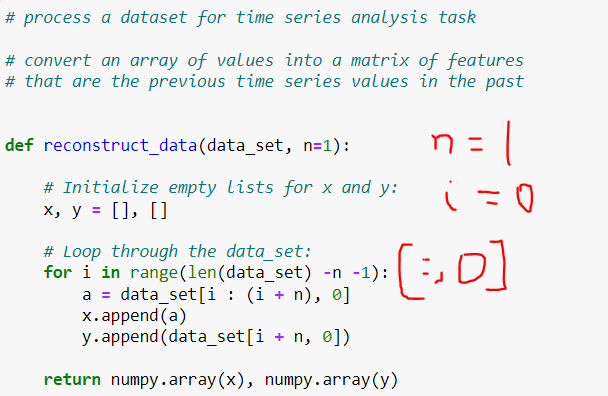

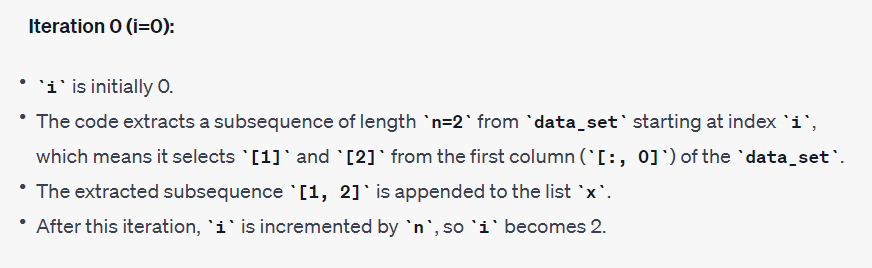

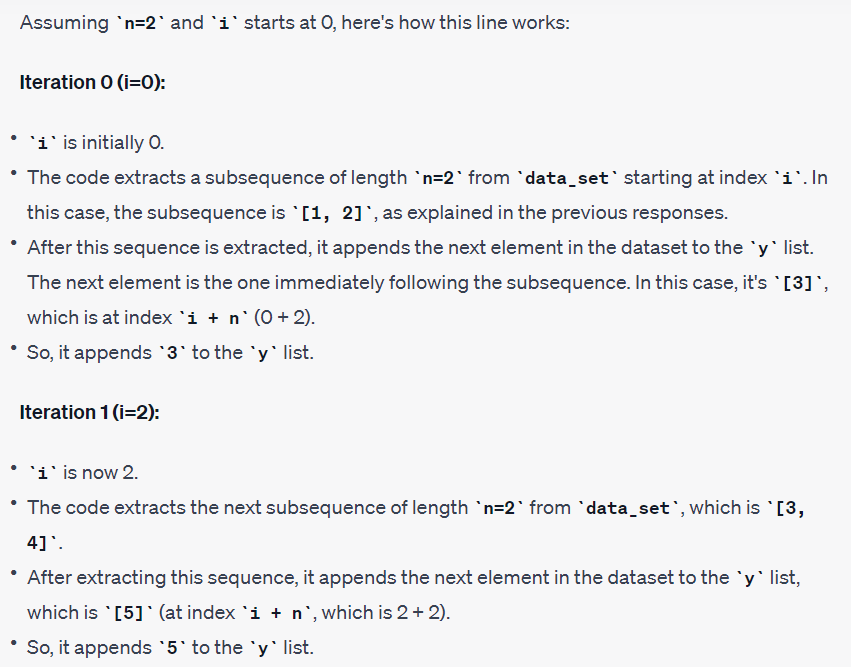

In [72]:
# process a dataset for time series analysis task

# convert an array of values into a matrix of features
# that are the previous time series values in the past

def reconstruct_data(data_set, n=1):
    
    # Initialize empty lists for x and y:
    x, y = [], []
    
    # Loop through the data_set:
    for i in range(len(data_set) -n -1):
        
        # we get the dataset starting at i upto i+n as far as the 0th column is concerned and we append it to x
        a = data_set[i : (i + n), 0]
        x.append(a)
        
        # for y, we are going to use the dataset as far as i+n is concerned
        y.append(data_set[i + n, 0])
    
    return numpy.array(x), numpy.array(y)

In [73]:
# we want to make sure the results will be the same
# every time we run the algorithm

# seed(1) - the computer is going to generate random numbers starting with the given seed
# seed(1) - if we use the same seed, then the same random numbers will be generated whenever we rerun the application
numpy.random.seed(1)

In [74]:
# load the dataset

data_frame = read_csv('daily-min-temperatures.csv')
print(data_frame)

            Date  Temperature
0     01/01/1981         20.7
1     02/01/1981         17.9
2     03/01/1981         18.8
3     04/01/1981         14.6
4     05/01/1981         15.8
...          ...          ...
3645  27/12/1990         14.0
3646  28/12/1990         13.6
3647  29/12/1990         13.5
3648  30/12/1990         15.7
3649  31/12/1990         13.0

[3650 rows x 2 columns]


In [75]:
print(data_frame.values)

[['01/01/1981' 20.7]
 ['02/01/1981' 17.9]
 ['03/01/1981' 18.8]
 ...
 ['29/12/1990' 13.5]
 ['30/12/1990' 15.7]
 ['31/12/1990' 13.0]]


In [76]:
# load the dataset

# we just need the temparature column

data_frame = read_csv('daily-min-temperatures.csv', usecols=[1])
# data_frame = read_csv('daily-min-temperatures.csv')

In [77]:
print(data_frame)

      Temperature
0            20.7
1            17.9
2            18.8
3            14.6
4            15.8
...           ...
3645         14.0
3646         13.6
3647         13.5
3648         15.7
3649         13.0

[3650 rows x 1 columns]


In [78]:
print(data_frame.values) # 2D array, in every single sub-array, a single temparature related value

[[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


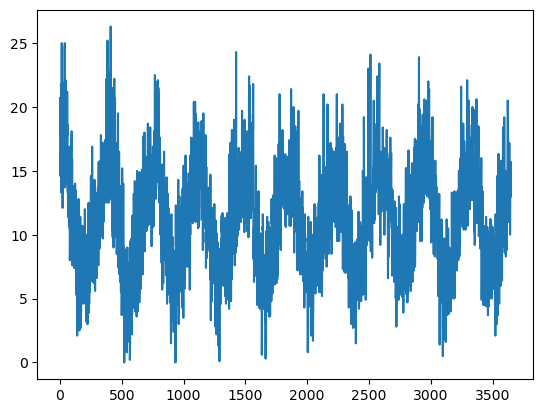

In [79]:
# in this case, it is stationary
# i.e., the statistical properties are constance
# variance is approximately constant
# non-stationary time series cannot be predicted in the future

plt.plot(data_frame)
plt.show()

In [80]:
# we are not going to deal with time series analysis
# we are using recurrent neural network

In [81]:
# we just need the temparature column
data = data_frame.values

# we are dealing with floating-point values
data = data.astype('float32')

In [82]:
# min-max normalization

# we are going to transform the values within the range 0 and 1 by using min-max normalization

scaler = MinMaxScaler(feature_range=(0,1))

data = scaler.fit_transform(data)

print(data)

[[0.7870723 ]
 [0.6806084 ]
 [0.7148289 ]
 ...
 [0.51330805]
 [0.5969582 ]
 [0.4942966 ]]


In [83]:
# split into train and test sets (70% - 30%)
train, test = data[0 : int(len(data) * 0.7), :], data[int(len(data) * 0.7) : len(data), :]

As far as the original dataset is concerned, we have just the temparatures

But of course, we need the dataset sort of features

So we are going to transform the data into a matrix

NUM_OF_PREV_ITEMS = 5

The constant is going to define that how many items, how many features we are dealing with

In this case, we are dealing with 3 features (data t, data t-1, data t-2)

So we will have 3 values of the time series

And we have the prediction

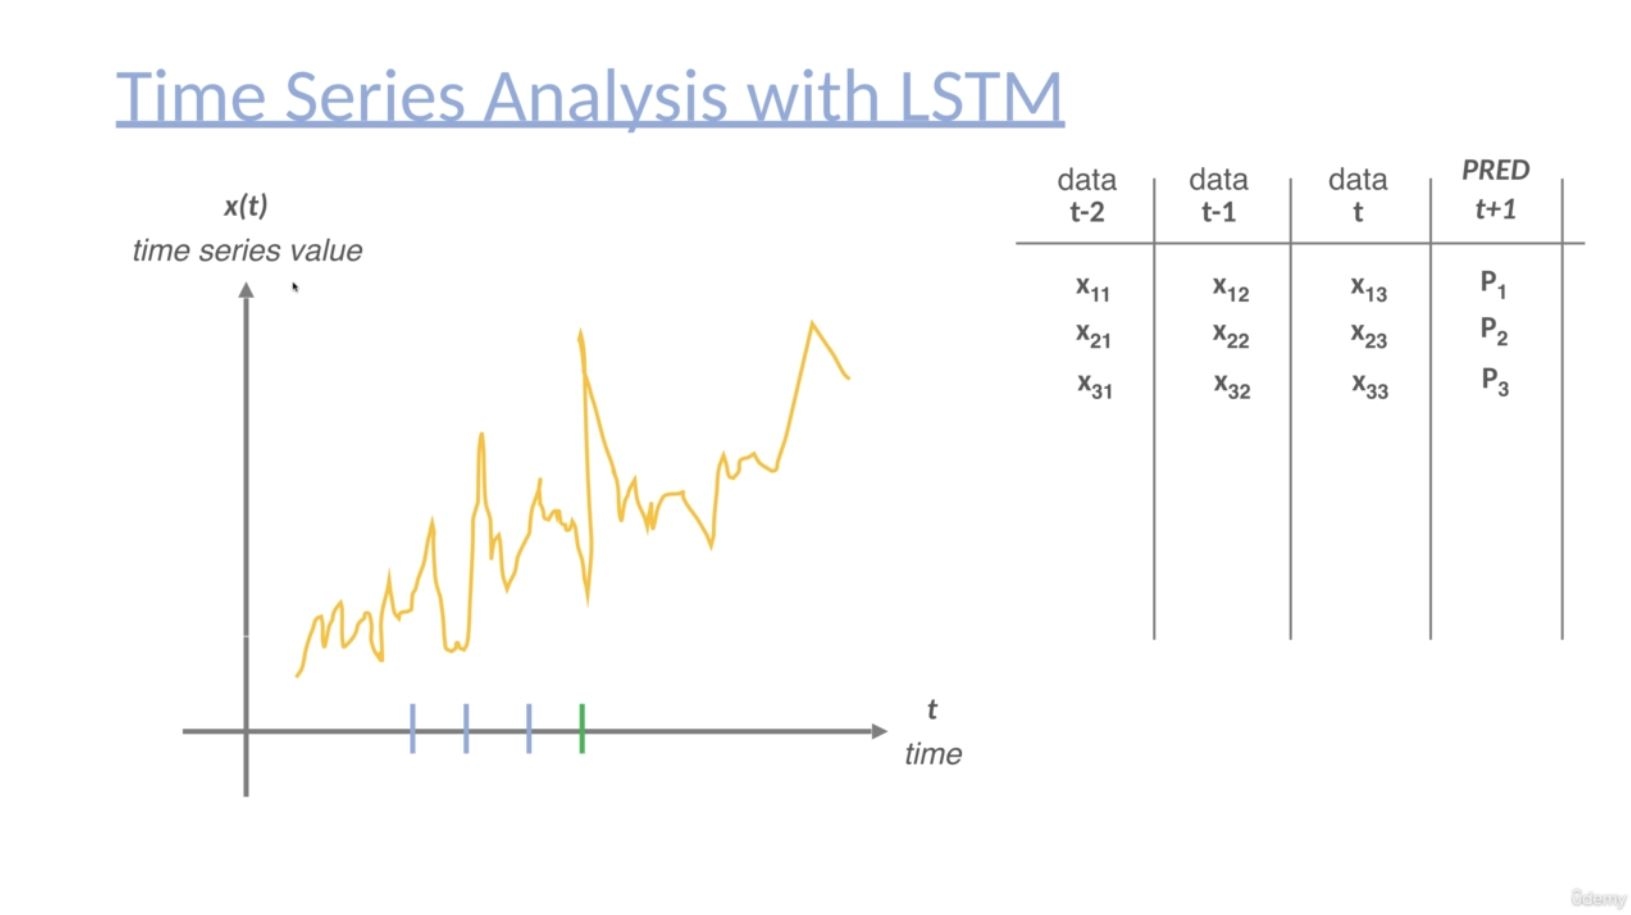

In [84]:
# create the training data and test data matrix

# we will construct the matrix with reconstruct_data function
# the result is the training features and we have the labels, prediiction for tomorrow

# train_x , we are going to have as many columns as the value of the number of previous items
# train_y label, these are the output variables is going to contain a single item associated with
# every single line of the dataset
# because we would like to predict the value of time series tomorrow at time t+1

train_x, train_y = reconstruct_data(train, NUM_OF_PREV_ITEMS)
test_x, test_y = reconstruct_data(test, NUM_OF_PREV_ITEMS)

print(train_x)
print(train_y)

[[0.7870723  0.6806084  0.7148289  0.5551331  0.6007605 ]
 [0.6806084  0.7148289  0.5551331  0.6007605  0.6007605 ]
 [0.7148289  0.5551331  0.6007605  0.6007605  0.6007605 ]
 ...
 [0.4334601  0.42585555 0.4600761  0.48288977 0.61596966]
 [0.42585555 0.4600761  0.48288977 0.61596966 0.53992397]
 [0.4600761  0.48288977 0.61596966 0.53992397 0.54372627]]
[0.6007605  0.6007605  0.661597   ... 0.53992397 0.54372627 0.50570345]


In [85]:
# LSTM architecture

# rehape input to be [numOfSamples, time steps, numOfFeatures]
# time steps is 1 because we want to predict the next value (t+1)

print((train_x.shape[0], 1, train_x.shape[1]))

train_x = numpy.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = numpy.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

(2549, 1, 5)


In [ ]:
# [numOfSamples, time steps, numOfFeatures]

# print((train_x.shape[0], 1, train_x.shape[1]))

# numOfSamples, how many items do we have all together in the training dataset

# we don't have to count the number of rows in the original dataset because we have transformed the dataset

# we have created 5 features and the 1 output and so on

# All together, we have 2549 rows in the dataset

# (2549, 1, 5)

# every single row contains 5 features (2549, 1, 5) NUM_OF_PREV_ITEMS = 5, so we are considering 5 observations in the past
# single feature value tomorrow, so it's time t+1

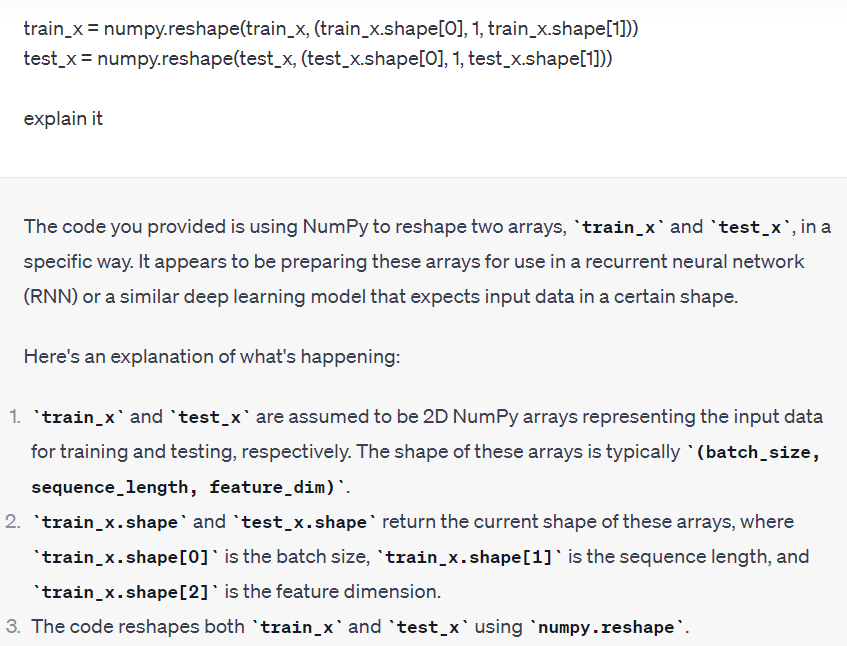

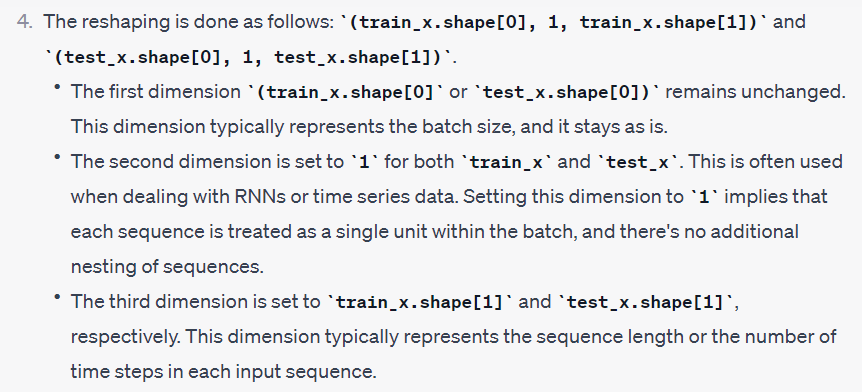

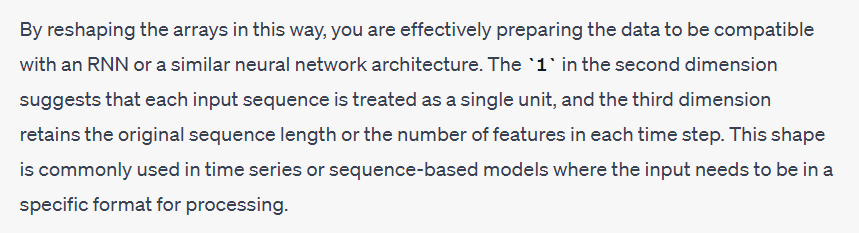

In [86]:
# 3D array

print (train_x)

[[[0.7870723  0.6806084  0.7148289  0.5551331  0.6007605 ]]

 [[0.6806084  0.7148289  0.5551331  0.6007605  0.6007605 ]]

 [[0.7148289  0.5551331  0.6007605  0.6007605  0.6007605 ]]

 ...

 [[0.4334601  0.42585555 0.4600761  0.48288977 0.61596966]]

 [[0.42585555 0.4600761  0.48288977 0.61596966 0.53992397]]

 [[0.4600761  0.48288977 0.61596966 0.53992397 0.54372627]]]


# LSTM architecture

In [89]:
# Create the LSTM model

# we have ordered LSTM layer with 100 neurons
# return_sequences=True,
# return_sequences=False (default), it means it is going to return with a single value

# But we would like to make sure to return with the sequence
# because it is going to be the input of next LSTM layer and the input shape is 1
# and the number of previous items. So, basically the number of features
# this is how we define the shape over the input

model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(1, NUM_OF_PREV_ITEMS)))

# Dropout regularization layer
# it means that during the training procedure, we are going to omit a single neuron in the hidden layer with 50% probability
# This is how we can avoid overfitting
model.add(Dropout(0.5))

# return_sequences=True, because we are going to add another LSTM layer with units=50 (50 neurons)
# whenever we have another LSTM layer, then we have to define return_sequences=True,
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50))
model.add(Dropout(0.3))

# we have to use a densely connected neural network layer with a single unit
# because we are going to make prediction for just a single value
# basically, we are dealing with a regression problem
# we would like to make prediction for time series value at time t+1
# this is going to be a scalar value
# so the numerical value for the time series related value tomorrow.
          
# In this case, we are using 3 recurrent neural network related layers
# Finally, we have a single output neuron on a densely connected neural network layer.
model.add(Dense(units=1))

# optimize the model with ADAM optimizer
# loss='mean_squared_error', because we are dealing with the regression problem
# loss='mean_squared_error', difference between the prediction made by the model and the values that are present
# in the dataset (the larger the difference between the two entities, the larger the error term)

# we would like to minimize this mean_squared_error loss function with the help of adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(train_x, train_y, epochs=10, batch_size=16, verbose=2)

Epoch 1/10
160/160 - 10s - loss: 0.0380 - 10s/epoch - 62ms/step
Epoch 2/10
160/160 - 1s - loss: 0.0148 - 757ms/epoch - 5ms/step
Epoch 3/10
160/160 - 1s - loss: 0.0142 - 698ms/epoch - 4ms/step
Epoch 4/10
160/160 - 1s - loss: 0.0131 - 708ms/epoch - 4ms/step
Epoch 5/10
160/160 - 1s - loss: 0.0122 - 763ms/epoch - 5ms/step
Epoch 6/10
160/160 - 1s - loss: 0.0117 - 735ms/epoch - 5ms/step
Epoch 7/10
160/160 - 1s - loss: 0.0115 - 702ms/epoch - 4ms/step
Epoch 8/10
160/160 - 1s - loss: 0.0116 - 711ms/epoch - 4ms/step
Epoch 9/10
160/160 - 1s - loss: 0.0111 - 707ms/epoch - 4ms/step
Epoch 10/10
160/160 - 1s - loss: 0.0109 - 742ms/epoch - 5ms/step


In [90]:
# make predictions and min-max normalization
test_predict = model.predict(test_x)

# because we have used min-max normalization at the beginning
# this is why we have to apply the inverse transformation on the test predicted values (test_predict)
test_predict = scaler.inverse_transform(test_predict)

# we have to use the same inverse transformation on the test labels
test_labels = scaler.inverse_transform([test_y])

35/35 [==============================] - 1s 3ms/step


In [93]:
# 2D array

print(test_labels)

[[15.19999937 17.         18.70000016 ... 13.59999969 13.50000078
  15.70000016]]


In [91]:
# Now, we are going to evaluate whether the model is working fine or not

In [94]:
# first of all, we have to calculate the mean squared error between the labels we know from the dataset (test_labels[0])
# and (test_predict[:, 0]) the predictions made by the model

test_score = mean_squared_error(test_labels[0], test_predict[:, 0])
print('Score on test set: %.2f MSE' % test_score)

Score on test set: 5.50 MSE


In [95]:
# plot the results (original data + predictions)
# predictions on the test data set

# with the help of empty_like function of numpy
# we are going to create a numpy array for as many items as the original dataset
# the result of this function is going to be random values. So, test_predict_plot will contain random values.
# but of course, for as many items as the size of the original dataset
test_predict_plot = numpy.empty_like(data)

# then we re-initialize all the values to be invalid values
# nan stands for not a number
# we would like to do so because if we plot invalid values, then nothing is going to happen
# and this is exactly what we want to do because then we are going to update the task prediction plot numpy array
# and the first items as far as the training samples are concerned, are going to remain invalid values
test_predict_plot[:, :] = numpy.nan

# as far as the test dataset is concerned, we are going to update the invalid values to be the predictions
# made by the model
test_predict_plot[len(train_x) + 2*NUM_OF_PREV_ITEMS + 1:len(data)-1, :] = test_predict

print(test_predict_plot)

[[      nan]
 [      nan]
 [      nan]
 ...
 [12.811444]
 [13.223841]
 [      nan]]


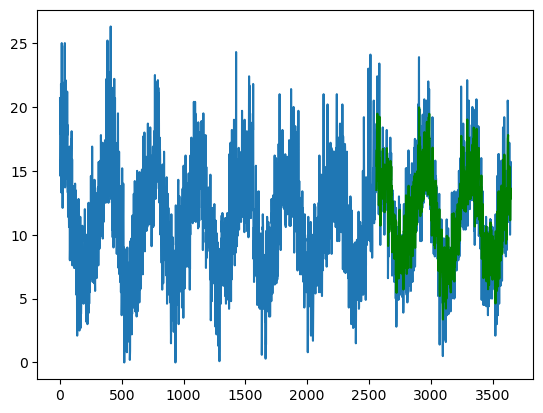

In [96]:
# we have to make sure that we do the inverse transformation because the dataset has been min-max transformed
# we have to apply the inverse_transform to get back the original dataset

plt.plot(scaler.inverse_transform(data))

# then we plot the prediction made by the model test_predict_plot
plt.plot(test_predict_plot, color='green')

plt.show()

We can come to the conclusion that we can understand the relationship between the features quite effectively with recurrent neural networks.

This is why, recurrent neural networks can be used for time series analysis

# Difference between CNN and RNN

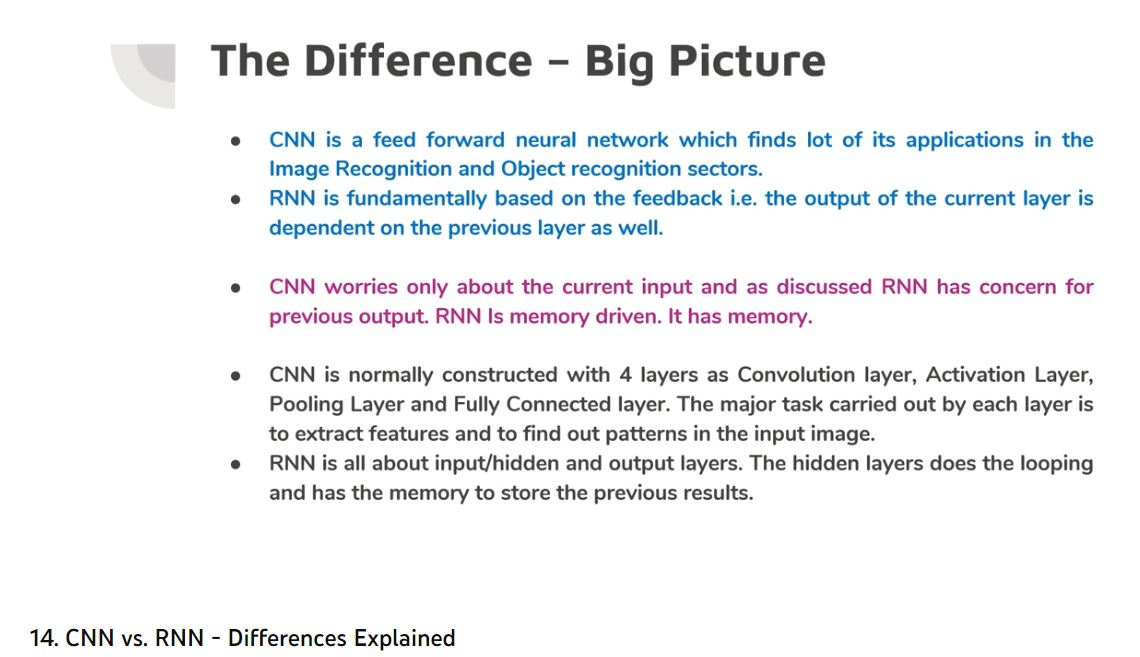

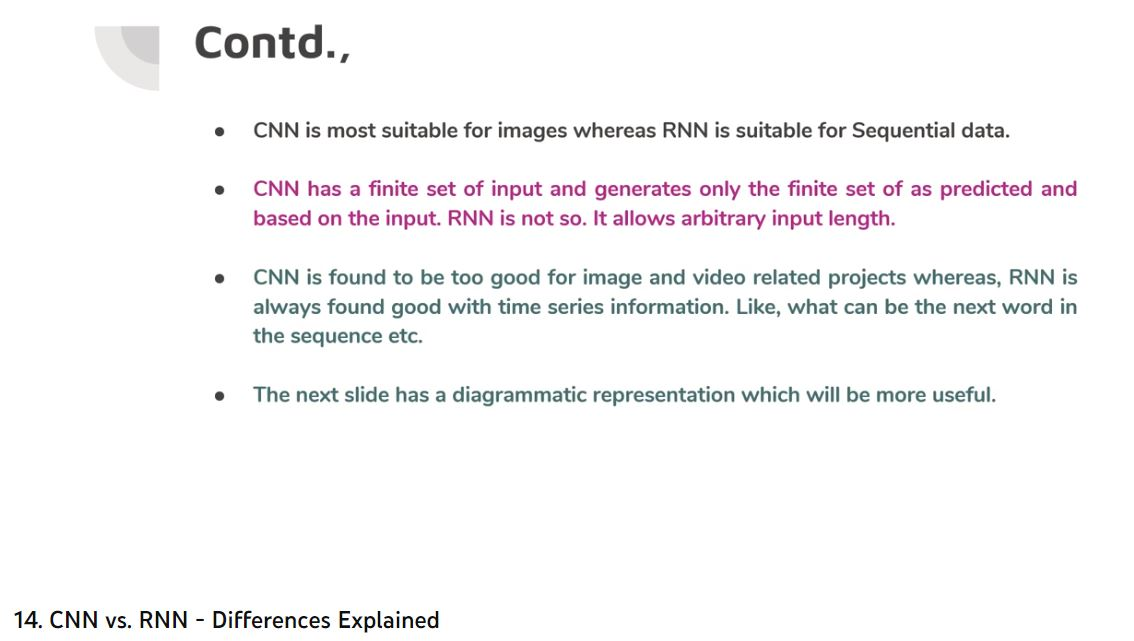

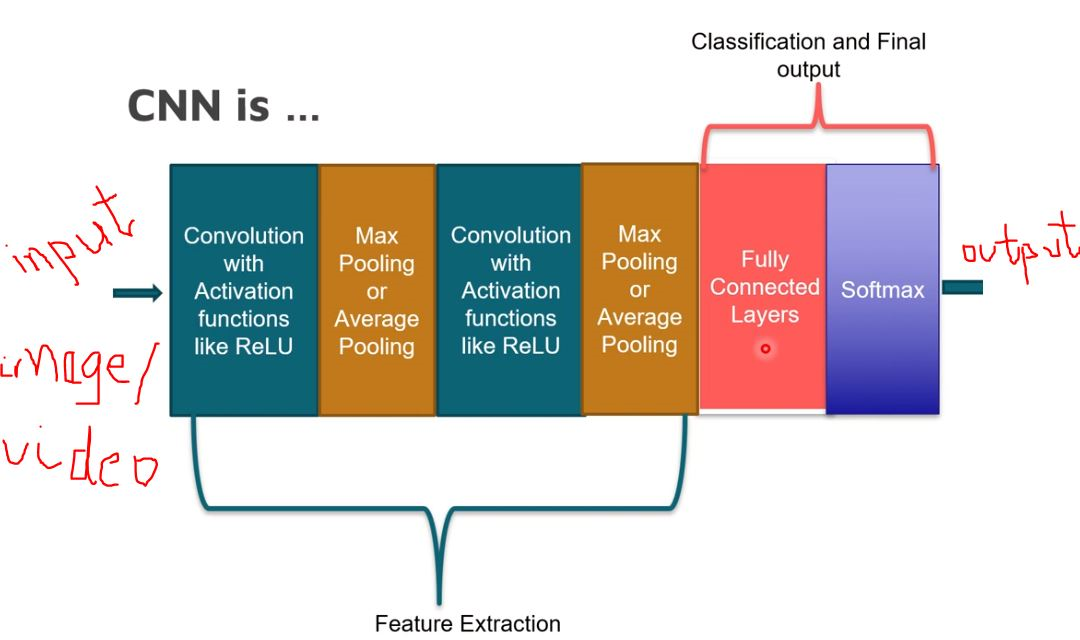

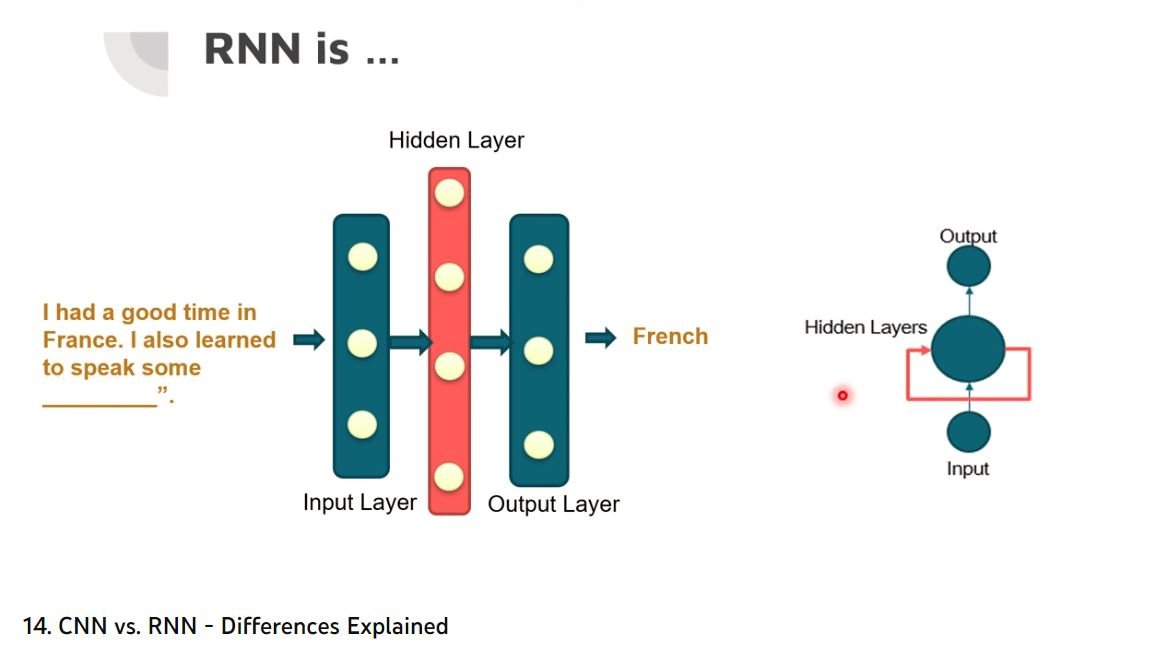